<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Social_Media_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing




## Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import data
onp_data = pd.read_csv("OnlineNewsPopularity.csv")

In [ ]:
onp_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Data Exploration

In [ ]:
onp_data.shape

(39644, 61)

In [ ]:
onp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [ ]:
onp_data.select_dtypes(include="object").columns

Index(['url'], dtype='object')

In [ ]:
len(onp_data.select_dtypes(include="object").columns)

1

In [ ]:
onp_data.select_dtypes(include=["float64","int64"]).columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glo

In [ ]:
len(onp_data.select_dtypes(include=["float64","int64"]).columns)

60

In [ ]:
# Statistical Summary
onp_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Dealing With Missing Values, NaN values, and Infinite values

In [ ]:
# Checking for missing data
onp_data.isnull().values.any()

False

In [ ]:
onp_data.isnull().values.sum()

0

In [ ]:
# Checking for NaN values
onp_data.isna().values.any().sum()

0

In [ ]:
onp_data.max()

url                             http://mashable.com/2014/12/27/youtube-channel...
timedelta                                                                   731.0
n_tokens_title                                                               23.0
n_tokens_content                                                           8474.0
n_unique_tokens                                                             701.0
                                                      ...                        
title_subjectivity                                                            1.0
title_sentiment_polarity                                                      1.0
abs_title_subjectivity                                                        0.5
abs_title_sentiment_polarity                                                  1.0
shares                                                                     843300
Length: 61, dtype: object

In [ ]:
onp_data.max().values

array(['http://mashable.com/2014/12/27/youtube-channels-2015/', 731.0,
       23.0, 8474.0, 701.0, 1042.0, 650.0, 304.0, 116.0, 128.0, 91.0,
       8.04153354633, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 377.0, 298400.0,
       42827.8571429, 843300.0, 843300.0, 843300.0, 3613.0398195,
       298400.0, 43567.6599458, 843300.0, 843300.0, 843300.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.926994384393, 0.925946986138,
       0.919999088666, 0.926533782685, 0.927190809258, 1.0,
       0.727840909091, 0.155487804878, 0.184931506849, 1.0, 1.0, 1.0, 1.0,
       1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.5, 1.0, 843300], dtype=object)

In [ ]:
onp_data.min()

url                             http://mashable.com/2013/01/07/amazon-instant-...
timedelta                                                                     8.0
n_tokens_title                                                                2.0
n_tokens_content                                                              0.0
n_unique_tokens                                                               0.0
                                                      ...                        
title_subjectivity                                                            0.0
title_sentiment_polarity                                                     -1.0
abs_title_subjectivity                                                        0.0
abs_title_sentiment_polarity                                                  0.0
shares                                                                          1
Length: 61, dtype: object

In [ ]:
onp_data.min().values

array(['http://mashable.com/2013/01/07/amazon-instant-video-browser/',
       8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, -0.39375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, -1.0, -1.0, -1.0, 0.0, -1.0, 0.0, 0.0, 1], dtype=object)

## Dealing With Categorical Data


In [ ]:
onp_data.select_dtypes(include="object").columns

Index(['url'], dtype='object')

In [ ]:
onp_data["url"].unique()

array(['http://mashable.com/2013/01/07/amazon-instant-video-browser/',
       'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/',
       'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/',
       ..., 'http://mashable.com/2014/12/27/son-pays-off-mortgage/',
       'http://mashable.com/2014/12/27/ukraine-blasts/',
       'http://mashable.com/2014/12/27/youtube-channels-2015/'],
      dtype=object)

In [ ]:
onp_data["url"].nunique()

39644

In [ ]:
# Dropping Object variable and removing final column
onp_dataset = onp_data.drop(["url", onp_data.keys()[1], onp_data.keys()[-1]], axis=1)

In [ ]:
onp_dataset.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


#2. Data Exploration

## Correlation Matrix

In [ ]:
# Correlation Matrix

corr = onp_dataset.corr()

In [ ]:
corr

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
n_tokens_title,1.000000,-0.018139,-0.049382,-0.043269,-0.044433,-0.062264,0.018538,-0.020446,0.090375,-0.056967,...,-0.050045,-0.025507,-0.022323,-0.018676,-0.029200,0.010053,0.079057,-0.002264,-0.143624,0.041517
n_tokens_content,-0.018139,1.000000,0.272661,0.795685,0.454596,0.614357,0.341971,0.265889,0.007072,0.807999,...,0.484630,-0.042208,0.643190,-0.339110,-0.513149,0.022473,-0.029509,0.000394,0.026993,-0.018211
n_unique_tokens,-0.049382,0.272661,1.000000,0.768214,0.951756,0.131561,0.125077,-0.202964,0.016626,0.713069,...,0.436398,0.376986,0.204631,-0.238058,-0.020395,-0.309439,-0.013545,-0.020771,-0.002610,-0.022715
n_non_stop_words,-0.043269,0.795685,0.768214,1.000000,0.843422,0.451520,0.297638,0.077477,-0.026727,0.953442,...,0.568541,0.224823,0.513013,-0.341322,-0.302035,-0.189343,-0.031389,-0.008375,0.014756,-0.028523
n_non_stop_unique_tokens,-0.044433,0.454596,0.951756,0.843422,1.000000,0.186634,0.147266,-0.219832,-0.000430,0.784275,...,0.473667,0.298066,0.316668,-0.270984,-0.135874,-0.245540,-0.033584,-0.024460,0.010497,-0.039671
num_hrefs,-0.062264,0.614357,0.131561,0.451520,0.186634,1.000000,0.415459,0.347361,0.032071,0.491712,...,0.355378,-0.035354,0.450754,-0.252741,-0.354125,0.003550,0.020847,0.016457,0.017911,0.037853
num_self_hrefs,0.018538,0.341971,0.125077,0.297638,0.147266,0.415459,1.000000,0.246613,0.103251,0.290008,...,0.197833,-0.000481,0.233450,-0.122592,-0.134207,-0.030022,-0.012117,0.016868,0.009338,-0.010155
num_imgs,-0.020446,0.265889,-0.202964,0.077477,-0.219832,0.347361,0.246613,1.000000,-0.144385,0.085066,...,0.132594,-0.039845,0.211979,-0.098793,-0.187294,0.057031,0.052382,0.036952,-0.005239,0.062672
num_videos,0.090375,0.007072,0.016626,-0.026727,-0.000430,0.032071,0.103251,-0.144385,1.000000,-0.044633,...,0.073166,0.006485,0.089525,-0.112825,-0.119844,0.006079,0.073342,0.004751,-0.019820,0.064619
average_token_length,-0.056967,0.807999,0.713069,0.953442,0.784275,0.491712,0.290008,0.085066,-0.044633,1.000000,...,0.575178,0.231238,0.511400,-0.345600,-0.301987,-0.198597,-0.036426,-0.012295,0.022364,-0.033410


## Heatmap

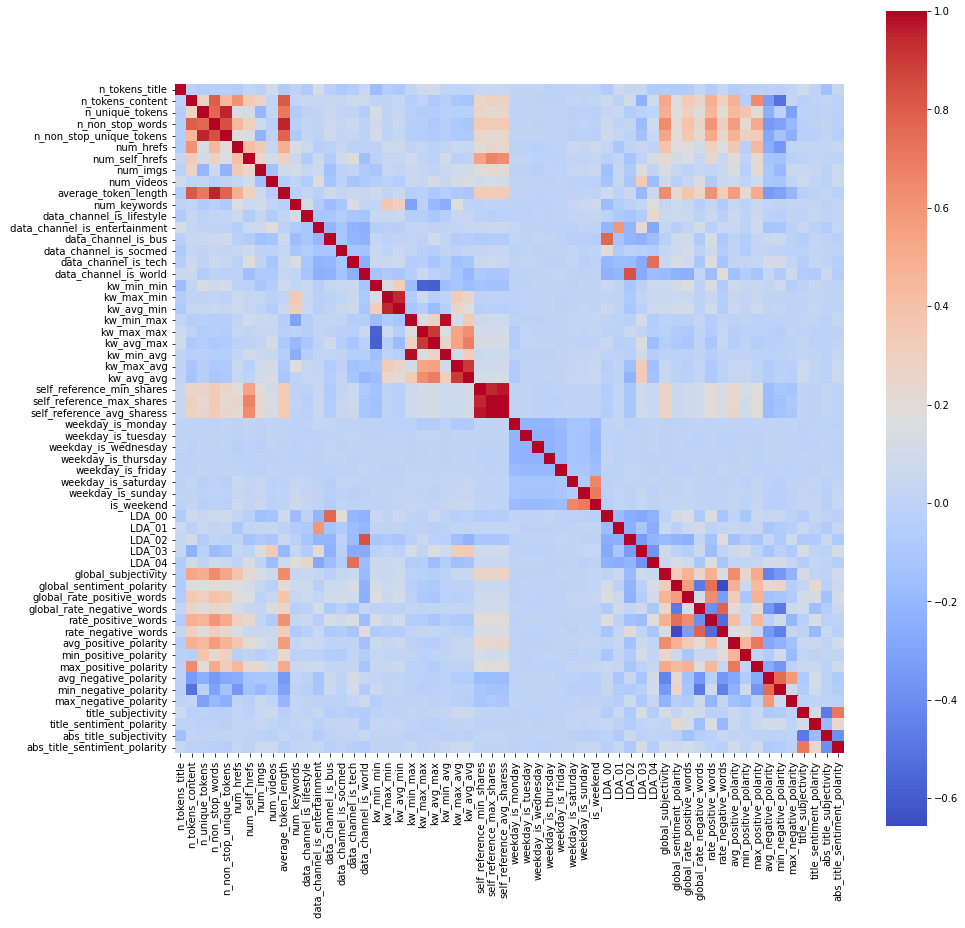

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True, square = True,  cmap="coolwarm" )

plt.show()

## Visualization

In [ ]:
# Visualise the features of the days of the week

columns_day = onp_dataset.columns.values[29:36]
unpop = onp_data[onp_data["shares"]<1400]
pop = onp_data[onp_data["shares"]>1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop [columns_day].sum().values

In [ ]:
from IPython import get_ipython
get_ipython().run_line_magic("matplotlib", "inline")

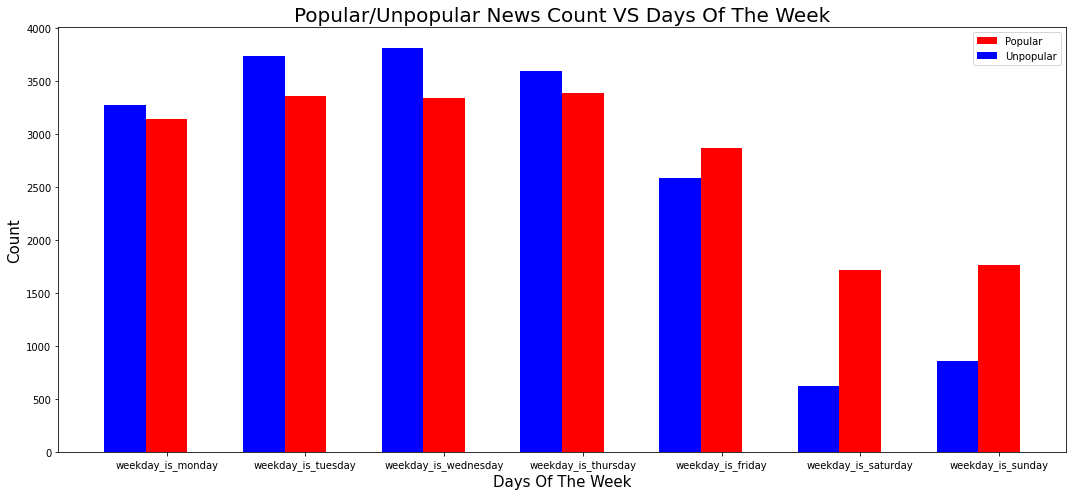

In [ ]:
fig = plt.figure(figsize = (15,7))
plt.title("Popular/Unpopular News Count VS Days Of The Week", fontsize = 20)

plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align = "center", color = "r", label = "Popular")

plt.bar(np.arange(len(columns_day)) - 0.3,  unpop_day, width = 0.3, align = "center", color = "b",  label = "Unpopular")

plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Days Of The Week", fontsize = 15)

plt.legend(loc = "upper right")
plt.tight_layout()

plt.show()

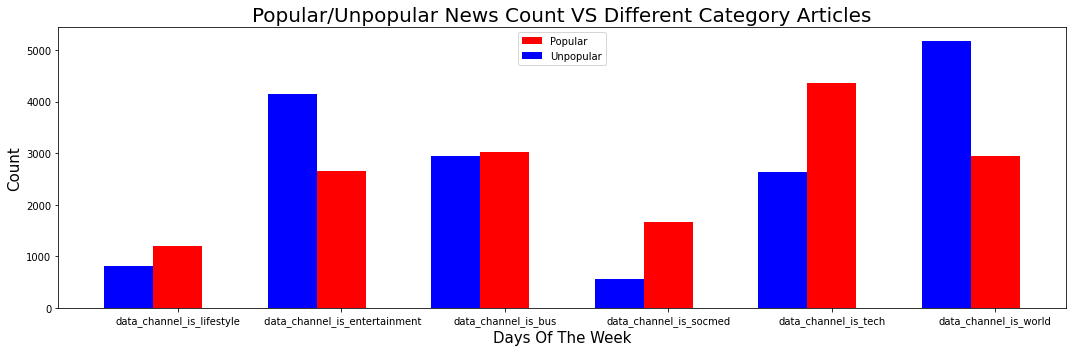

In [ ]:
# Visualization of Different Article Category

columns_chan = onp_dataset.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values



fig = plt.figure(figsize = (15,5))
plt.title("Popular/Unpopular News Count VS Different Category Articles", fontsize = 20)

plt.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align = "center", color = "r", label = "Popular")

plt.bar(np.arange(len(columns_chan)) - 0.3,  unpop_chan, width = 0.3, align = "center", color = "b",  label = "Unpopular")

plt.xticks(np.arange(len(columns_chan)), columns_chan)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Days Of The Week", fontsize = 15)

plt.legend(loc = "upper center")
plt.tight_layout()

plt.show()


In [ ]:
popular=onp_data.shares>= 1400
unpopular=onp_data.shares<1400
onp_data.loc[popular,'shares']=1
onp_data.loc[unpopular,'shares']=0


In [ ]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]


In [ ]:
cols1=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [ ]:
cols2= ["url","timedelta","shares"]

In [ ]:
for i in onp_data.columns:
    if i not in cols and i not in cols1 and i not in cols2:
        onp_data[i]=np.log(1.001+onp_data[i])


In [ ]:
onp_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,0


In [ ]:
features = list(onp_data.columns[2:60])

#Dataset Splitting - ( Test & Train Sets )




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(onp_data[features], onp_data["shares"], test_size = 0.25, random_state = 0)

In [ ]:
x_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
510,2.397986,5.620404,0.478801,0.693647,0.593281,1.098946,0.001000,1.791926,0.001000,1.794951,...,0.321296,0.033333,0.7,-0.380000,-0.50,-0.20,0.000000,0.001000,0.406132,0.000000
14407,2.397986,5.961008,0.374376,0.693647,0.428845,1.386544,0.693647,0.693647,0.001000,1.726077,...,0.414935,0.136364,0.5,-0.222222,-0.30,-0.10,0.500000,0.406132,0.001000,0.500000
7430,2.302685,6.804616,0.409962,0.693647,0.509607,3.332240,2.484990,0.693647,2.397986,1.722826,...,0.403975,0.100000,1.0,-0.325868,-0.70,-0.10,0.441667,0.049742,0.057640,0.050000
8439,1.946053,5.493066,0.486123,0.693647,0.528344,2.302685,1.609638,0.693647,0.001000,1.763288,...,0.338889,0.166667,0.5,-0.109375,-0.15,-0.10,0.300000,-0.104250,0.183155,0.100000
29869,2.397986,6.413461,0.426940,0.693647,0.523174,1.609638,1.386544,0.693647,0.693647,1.775650,...,0.410143,0.150000,0.8,-0.266667,-1.00,-0.10,0.000000,0.001000,0.406132,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,2.565026,7.349874,0.336171,0.693647,0.472464,3.044570,2.708117,1.386544,0.001000,1.765980,...,0.285253,0.033333,1.0,-0.277083,-1.00,-0.10,0.383333,-0.201301,0.111243,0.183333
32103,2.708117,6.960349,0.401848,0.693647,0.524144,2.079567,1.609638,0.001000,3.295874,1.681613,...,0.430118,0.050000,1.0,-0.431391,-1.00,-0.05,0.000000,0.001000,0.406132,0.000000
30403,2.484990,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.693647,0.001000,...,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.900000,-0.913794,0.337186,0.600000
21243,2.565026,6.439352,0.425350,0.693647,0.540749,2.302685,1.098946,1.098946,0.001000,1.671060,...,0.287810,0.033333,0.8,-0.215432,-0.40,-0.10,0.200000,0.096219,0.263133,0.100000


In [ ]:
x_test

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
18765,2.197336,6.698269,0.376171,0.693647,0.485477,2.833272,2.079567,0.693647,0.001000,1.782418,...,0.355966,0.100000,0.6,-0.194444,-0.600000,-0.050000,0.000000,0.001000,0.406132,0.000000
16349,2.565026,4.812192,0.518539,0.693647,0.579045,2.079567,1.098946,0.693647,0.001000,1.715306,...,0.666667,0.500000,1.0,-0.220000,-0.500000,-0.150000,0.433333,0.065476,0.065476,0.066667
27703,2.565026,6.793467,0.331068,0.693647,0.395178,1.946053,1.386544,3.135538,1.098946,1.742864,...,0.328018,0.100000,1.0,-0.108333,-0.166667,-0.050000,1.000000,-0.286350,0.406132,0.250000
32947,2.302685,7.188413,0.323497,0.693647,0.426405,3.465767,2.484990,2.639129,0.001000,1.716066,...,0.359793,0.062500,0.8,-0.144266,-0.500000,-0.050000,0.000000,0.001000,0.406132,0.000000
35434,2.197336,5.568348,0.468223,0.693647,0.543610,2.197336,1.386544,1.609638,0.001000,1.723219,...,0.330556,0.033333,1.0,-0.198611,-0.300000,-0.125000,0.344444,-0.257189,0.145446,0.227778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,2.397986,6.180019,0.429339,0.693647,0.482547,3.332240,1.791926,1.609638,0.001000,1.792963,...,0.407692,0.033333,0.8,-0.359722,-0.500000,-0.166667,0.500000,0.406132,0.001000,0.500000
18927,2.484990,5.273005,0.508297,0.693647,0.611214,1.791926,1.791926,0.693647,0.001000,1.802181,...,0.205628,0.033333,0.5,-0.500000,-0.500000,-0.500000,0.000000,0.001000,0.406132,0.000000
24021,2.484990,6.683362,0.366853,0.693647,0.475127,2.944492,1.791926,0.693647,0.693647,1.770823,...,0.336216,0.100000,0.5,-0.180000,-0.250000,-0.100000,0.000000,0.001000,0.406132,0.000000
25369,2.708117,6.728630,0.346658,0.693647,0.447416,2.833272,1.946053,1.098946,0.001000,1.719733,...,0.372500,0.160000,0.7,-0.270455,-1.000000,-0.050000,0.900000,-0.691149,0.337186,0.500000


In [ ]:
y_train

510      1
14407    1
7430     0
8439     1
29869    0
        ..
20757    1
32103    0
30403    1
21243    1
2732     1
Name: shares, Length: 29733, dtype: int64

In [ ]:
y_test

18765    0
16349    1
27703    1
32947    1
35434    1
        ..
13277    1
18927    0
24021    0
25369    1
24670    0
Name: shares, Length: 9911, dtype: int64

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.09155445, -0.21018346,  0.58022695, ..., -0.02041727,
         0.82108149, -0.68941404],
       [-0.09155445,  0.05791833, -0.47113318, ...,  0.73572751,
        -1.89845355,  1.52016289],
       [-0.59106288,  0.72195374, -0.11284986, ...,  0.07055666,
        -1.51824364, -0.46845635],
       ...,
       [ 0.3644648 , -4.63342885, -4.23028173, ..., -1.72780185,
         0.35827161,  1.96207828],
       [ 0.78396478,  0.43444095,  0.04207978, ...,  0.15730162,
        -0.13882536, -0.24749866],
       [-0.09155445, -0.49994917,  0.85558731, ...,  0.53921915,
        -1.57125854,  0.85728981]])

In [ ]:
x_test

array([[-1.14323827,  0.63824453, -0.4530565 , ..., -0.02041727,
         0.82108149, -0.68941404],
       [ 0.78396478, -0.84635758,  0.98030057, ...,  0.09992189,
        -1.46564415, -0.39480379],
       [ 0.78396478,  0.71317844, -0.90714976, ..., -0.55673016,
         0.82108149,  0.41537442],
       ...,
       [ 0.3644648 ,  0.6265106 , -0.54687173, ..., -0.02041727,
         0.82108149, -0.68941404],
       [ 1.53395573,  0.66214244, -0.75019045, ..., -1.31225436,
         0.35827161,  1.52016289],
       [ 1.17236341,  0.87672934, -0.36245257, ..., -1.84794729,
         0.82108149,  2.07255713]])

# Model Building

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier (n_estimators=100, n_jobs=-1)
clf_rf = rf.fit(x_train, y_train)
print("Accuracy")
print(clf_rf.score(x_test, y_test))

Accuracy
0.6633034002623348


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nb = BernoulliNB()
clf_nb = nb.fit(x_train, y_train)

print( "Accuracy")
print(clf_nb.score(x_test, y_test))

Accuracy
0.6322268186863081
